<a href="https://colab.research.google.com/github/heoaa/ML_MachineLearning/blob/main/1.%20%ED%98%BC%EC%9E%90%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D/K_Neares_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

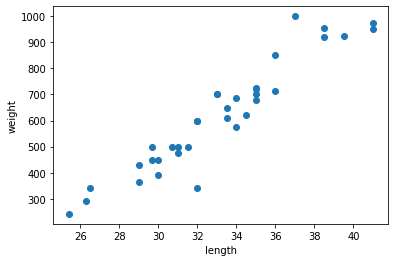

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')    # x축 이름 설정
plt.ylabel('weight')    # y축 이름 설정
plt.show()

**도미 데이터를 확인해보면 길이가 길수록 무게가 많이 나가는 형태를 보이고 있다. (선형적)**

In [ ]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

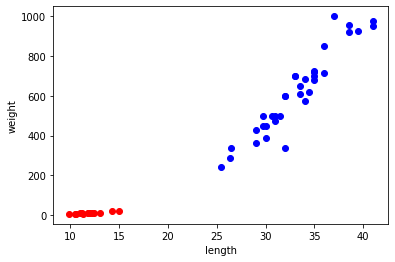

In [ ]:
plt.scatter(bream_length, bream_weight, c='b')
plt.scatter(smelt_length, smelt_weight, c='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**빙어와 도미 데이터를 같이 확인해보면 빙어가 도미에 비해 길이도 무게도 매우 작은 것을 알 수 있다. 빙어도 도미와 비슷하게 길이와 무게가 비례하나 늘어나는 정도가 달라보인다. 따라서 빙어의 산점도도 선형적이나 무게가 길이에 영향을 덜 받는다고 볼 수 있다.**

# K-최근접 이웃(K-NN) 알고리즘
k-최근접 이웃 알고리즘은 가장 간단하고 이해하기 쉬운 머신러닝 분류 알고리즘으로 가장 가까운 이웃을 참고하여 정답을 예측한다.

In [ ]:
# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 2차원 리스트(리스트내 리스트)로 변환
# 이때, zip() 함수는 나열된 리스트에서 원소를 하나씩 꺼내주는 일을 한다.
fish_data = [ [l, w] for l, w in zip(length, weight)]
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [ ]:
# 정답 데이터 생성
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# 사이킷런 패키지의 k-nn 클래스 임포트
from sklearn.neighbors import KNeighborsClassifier

# 객체 생성
kn = KNeighborsClassifier()

# 알고리즘 훈련
kn.fit(fish_data, fish_target)

# 정확도(accuracy) 확인
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 길이 30, 무게 600인 데이터 예측
# 훈련이든 예측이든 2차원 형태의 데이터를 입력해야 함
kn.predict([[30, 600]])

array([1])

반환 값은 1이므로 도미로 예측한 것을 확인할 수 있다.

## n_neighbors 매개변수
n_neighbors의 기본 값은 5이다.

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

가장 가까운 데이터 49개를 사용하는 모델은 fish_data에 있는 모든 생선을 사용하여 예측하게 된다. 즉, 49개 데이터 중 도미가 35개로 다수를 차지하므로 어떤 데이터를 넣어도 무조건 도미로 예측하게 된다. kn49 모델을 도미만 올바르게 맞히기 때문에 정확도가 떨어진 것을 볼 수 있다.